In [1]:
import os

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
data_saud = pd.read_csv('./data/2020-12-05-dataComBairro.csv')
data_saud.head(10)

DT_NOTIFIC                ID_UNIDADE  NU_IDADE_N   CS_RACA FATOR_RISC  \
0  2019-01-02  HOSPITAL BOSQUE DA SAUDE          27    BRANCA        NaN   
1  2019-02-11  HOSPITAL BOSQUE DA SAUDE          40  IGNORADO        NaN   
2  2019-02-18  HOSPITAL BOSQUE DA SAUDE          26  IGNORADO        NaN   
3  2019-03-14  HOSPITAL BOSQUE DA SAUDE          23    BRANCA        NaN   
4  2019-03-23  HOSPITAL BOSQUE DA SAUDE          22     PARDA        NaN   
5  2019-03-26  HOSPITAL BOSQUE DA SAUDE          63  IGNORADO        NaN   
6  2019-05-22  HOSPITAL BOSQUE DA SAUDE          41  IGNORADO        NaN   
7  2019-05-23  HOSPITAL BOSQUE DA SAUDE           1     PARDA        NaN   
8  2019-05-24  HOSPITAL BOSQUE DA SAUDE          67  IGNORADO        NaN   
9  2019-06-04  HOSPITAL BOSQUE DA SAUDE           1    BRANCA        NaN   

   TOSSE  DISPNEIA  MIALGIA  ASMA  PNEUMOPATI  ...  HOSPITAL  UTI  CLASSI_FIN  \
0    0.0       1.0        0   0.0         NaN  ...       1.0  1.0         4.0   
1    1.0       1.0        0   0.0         NaN  ...       1.0  0.0         4.0   
2    0.0       0.0        0   0.0         0.0  ...       1.0  0.0         4.0   
3    1.0       1.0        0   0.0         NaN  ...       1.0  1.0         4.0   
4    1.0       1.0        0   0.0         NaN  ...       1.0  1.0         4.0   
5    1.0       1.0        0   0.0         1.0  ...       1.0  1.0         1.0   
6    1.0       1.0        0   0.0         1.0  ...       1.0  1.0         4.0   
7    1.0       1.0        0   0.0         NaN  ...       1.0  1.0         4.0   
8    1.0       1.0        0   0.0         1.0  ...       1.0  1.0         4.0   
9    1.0       1.0        0   0.0         NaN  ...       1.0  1.0         4.0   

   EVOLUCAO  INFLUENZA  OUTRO_VIRUS OUTRO_AGENTE  N_ESPECIFICADO  COVID19  \
0     OBITO        0.0          0.0          0.0             1.0      0.0   
1       NaN        0.0          0.0          0.0             1.0      0.0   
2       NaN        0.0          0.0          0.0             1.0      0.0   
3      CURA        0.0          0.0          0.0             1.0      0.0   
4      CURA        0.0          0.0          0.0             1.0      0.0   
5      CURA        1.0          0.0          0.0             0.0      0.0   
6       NaN        0.0          0.0          0.0             1.0      0.0   
7       NaN        0.0          0.0          0.0             1.0      0.0   
8       NaN        0.0          0.0          0.0             1.0      0.0   
9      CURA        0.0          0.0          0.0             1.0      0.0   

   Bairro  
0   Saúde  
1   Saúde  
2   Saúde  
3   Saúde  
4   Saúde  
5   Saúde  
6   Saúde  
7   Saúde  
8   Saúde  
9   Saúde  

[10 rows x 23 columns]

In [3]:
data_saud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113808 entries, 0 to 113807
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DT_NOTIFIC      113808 non-null  object 
 1   ID_UNIDADE      113808 non-null  object 
 2   NU_IDADE_N      113808 non-null  int64  
 3   CS_RACA         100368 non-null  object 
 4   FATOR_RISC      110380 non-null  object 
 5   TOSSE           99563 non-null   float64
 6   DISPNEIA        98523 non-null   float64
 7   MIALGIA         113808 non-null  int64  
 8   ASMA            39710 non-null   float64
 9   PNEUMOPATI      37874 non-null   float64
 10  TABAGISMO       113808 non-null  int64  
 11  ANTIVIRAL       102789 non-null  float64
 12  VACINA          88891 non-null   float64
 13  HOSPITAL        112814 non-null  float64
 14  UTI             101277 non-null  float64
 15  CLASSI_FIN      113808 non-null  float64
 16  EVOLUCAO        104221 non-null  object 
 17  INFLUENZA 

In [4]:
covid = data_saud[data_saud['COVID19'] == 1.0]
covid = covid[['DT_NOTIFIC', 'Bairro', 'COVID19', 'EVOLUCAO', 'NU_IDADE_N', 'FATOR_RISC']]
covid.DT_NOTIFIC = pd.to_datetime(covid.DT_NOTIFIC, infer_datetime_format=True)
covid.head()

DT_NOTIFIC Bairro  COVID19 EVOLUCAO  NU_IDADE_N FATOR_RISC
18 2020-03-18  Saúde      1.0    OBITO          60          S
20 2020-03-20  Saúde      1.0    OBITO          50          N
24 2020-03-22  Saúde      1.0     CURA          49          N
30 2020-03-24  Saúde      1.0     CURA          65          N
31 2020-03-25  Saúde      1.0     CURA          48          S

In [5]:
covidObito = covid[covid['EVOLUCAO'] == 'OBITO']
covidObito = covidObito[['Bairro','EVOLUCAO']].groupby(['Bairro']).count()
covidObito.rename(columns={'EVOLUCAO':'OBITOS'}, inplace = True)
CovidCasos = covid[['Bairro','COVID19']].groupby(['Bairro']).count()
CovidCasos.rename(columns={'COVID19':'CASOS'}, inplace = True)
covidObito = pd.merge(covidObito,CovidCasos, left_index=True, right_index=True)
covidObito.head()

OBITOS  CASOS
Bairro                           
Aclimação              116    460
Alto da Mooca          146    935
Balneário São José      23     74
Barra Funda             28    116
Bela Vista            1581   8236

In [6]:
covidObito['TAXA_MORTALIDADE']=(covidObito['OBITOS']/covidObito['CASOS'])*100
covidObito = covidObito.sort_values(['CASOS'], ascending = False)
#covidObito = covidObito.query("CASOS > 100")
covidObito

OBITOS  CASOS  TAXA_MORTALIDADE
Bairro                                                                   
Bela Vista                                  1581   8236         19.196212
Cerqueira César                             1411   3905         36.133163
Santana                                      438   3221         13.598261
Vila Buarque                                1219   2962         41.154625
Vila Carmosina                               576   2429         23.713462
...                                          ...    ...               ...
Jardim Iporã                                   1      1        100.000000
Parque Novo Santo Amaro                        1      1        100.000000
Jardim Santa Edwiges (Capela do Socorro)       1      1        100.000000
Jardim Tietê                                   1      1        100.000000
Vila das Belezas                               1      1        100.000000

[116 rows x 3 columns]

In [7]:
covidIdade = covid[['Bairro','NU_IDADE_N']].groupby(['Bairro']).mean()
covidIdade.rename(columns={'NU_IDADE_N':'IDADE_M'}, inplace = True)
covidIdade.head()

IDADE_M
Bairro                       
Aclimação           60.765217
Alto da Mooca       51.829947
Balneário São José  58.932432
Barra Funda         54.612069
Bela Vista          63.304517

In [8]:
covidObito = pd.merge(covidObito,covidIdade, left_index=True, right_index=True)
covidObito

OBITOS  CASOS  TAXA_MORTALIDADE  \
Bairro                                                                      
Bela Vista                                  1581   8236         19.196212   
Cerqueira César                             1411   3905         36.133163   
Santana                                      438   3221         13.598261   
Vila Buarque                                1219   2962         41.154625   
Vila Carmosina                               576   2429         23.713462   
...                                          ...    ...               ...   
Jardim Iporã                                   1      1        100.000000   
Parque Novo Santo Amaro                        1      1        100.000000   
Jardim Santa Edwiges (Capela do Socorro)       1      1        100.000000   
Jardim Tietê                                   1      1        100.000000   
Vila das Belezas                               1      1        100.000000   

                                            IDADE_M  
Bairro                                               
Bela Vista                                63.304517  
Cerqueira César                           58.385659  
Santana                                   55.856256  
Vila Buarque                              69.938217  
Vila Carmosina                            54.518320  
...                                             ...  
Jardim Iporã                              46.000000  
Parque Novo Santo Amaro                   59.000000  
Jardim Santa Edwiges (Capela do Socorro)  68.000000  
Jardim Tietê                              51.000000  
Vila das Belezas                          81.000000  

[116 rows x 4 columns]

In [9]:
covidRisco = covid[covid['FATOR_RISC'] == 'S']
covidRisco = covidRisco[['Bairro','FATOR_RISC']].groupby(['Bairro']).count() 
covidRisco

FATOR_RISC
Bairro                        
Aclimação                  367
Alto da Mooca              515
Balneário São José          53
Barra Funda                 63
Bela Vista                5684
...                        ...
Vila Romana                212
Vila Santa Clara          1100
Vila Santana               156
Vila das Belezas             1
Vila do Sol                  8

[120 rows x 1 columns]

In [10]:
covidObito = pd.merge(covidObito,covidRisco, left_index=True, right_index=True)
covidObito

OBITOS  CASOS  TAXA_MORTALIDADE  \
Bairro                                                                      
Bela Vista                                  1581   8236         19.196212   
Cerqueira César                             1411   3905         36.133163   
Santana                                      438   3221         13.598261   
Vila Buarque                                1219   2962         41.154625   
Vila Carmosina                               576   2429         23.713462   
...                                          ...    ...               ...   
Itaim Bibi                                     1      1        100.000000   
Jardim Casablanca                              1      1        100.000000   
Jardim Santa Edwiges (Capela do Socorro)       1      1        100.000000   
Jardim Tietê                                   1      1        100.000000   
Vila das Belezas                               1      1        100.000000   

                                            IDADE_M  FATOR_RISC  
Bairro                                                           
Bela Vista                                63.304517        5684  
Cerqueira César                           58.385659        3474  
Santana                                   55.856256        1877  
Vila Buarque                              69.938217        2496  
Vila Carmosina                            54.518320        1524  
...                                             ...         ...  
Itaim Bibi                                69.000000           1  
Jardim Casablanca                         64.000000           1  
Jardim Santa Edwiges (Capela do Socorro)  68.000000           1  
Jardim Tietê                              51.000000           1  
Vila das Belezas                          81.000000           1  

[114 rows x 5 columns]

In [11]:
covidObito['FATOR_RISC']=(covidObito['FATOR_RISC']/covidObito['CASOS'])*100
covidObito

OBITOS  CASOS  TAXA_MORTALIDADE  \
Bairro                                                                      
Bela Vista                                  1581   8236         19.196212   
Cerqueira César                             1411   3905         36.133163   
Santana                                      438   3221         13.598261   
Vila Buarque                                1219   2962         41.154625   
Vila Carmosina                               576   2429         23.713462   
...                                          ...    ...               ...   
Itaim Bibi                                     1      1        100.000000   
Jardim Casablanca                              1      1        100.000000   
Jardim Santa Edwiges (Capela do Socorro)       1      1        100.000000   
Jardim Tietê                                   1      1        100.000000   
Vila das Belezas                               1      1        100.000000   

                                            IDADE_M  FATOR_RISC  
Bairro                                                           
Bela Vista                                63.304517   69.014085  
Cerqueira César                           58.385659   88.962868  
Santana                                   55.856256   58.273828  
Vila Buarque                              69.938217   84.267387  
Vila Carmosina                            54.518320   62.741869  
...                                             ...         ...  
Itaim Bibi                                69.000000  100.000000  
Jardim Casablanca                         64.000000  100.000000  
Jardim Santa Edwiges (Capela do Socorro)  68.000000  100.000000  
Jardim Tietê                              51.000000  100.000000  
Vila das Belezas                          81.000000  100.000000  

[114 rows x 5 columns]

<AxesSubplot:>

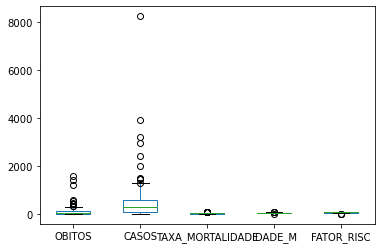

In [12]:
covidObito.plot.box()

In [13]:
norm = covid.COVID19.size
norm2 = sum(covidObito['OBITOS'])

In [14]:
covidObito['OBITOS'] = (covidObito['OBITOS']/norm2)*100
covidObito['CASOS'] = (covidObito['CASOS']/norm)*100
covidObito

OBITOS      CASOS  \
Bairro                                                           
Bela Vista                                10.082265  12.789813   
Cerqueira César                            8.998151   6.064135   
Santana                                    2.793189   5.001941   
Vila Buarque                               7.773739   4.599736   
Vila Carmosina                             3.673235   3.772032   
...                                             ...        ...   
Itaim Bibi                                 0.006377   0.001553   
Jardim Casablanca                          0.006377   0.001553   
Jardim Santa Edwiges (Capela do Socorro)   0.006377   0.001553   
Jardim Tietê                               0.006377   0.001553   
Vila das Belezas                           0.006377   0.001553   

                                          TAXA_MORTALIDADE    IDADE_M  \
Bairro                                                                  
Bela Vista                                       19.196212  63.304517   
Cerqueira César                                  36.133163  58.385659   
Santana                                          13.598261  55.856256   
Vila Buarque                                     41.154625  69.938217   
Vila Carmosina                                   23.713462  54.518320   
...                                                    ...        ...   
Itaim Bibi                                      100.000000  69.000000   
Jardim Casablanca                               100.000000  64.000000   
Jardim Santa Edwiges (Capela do Socorro)        100.000000  68.000000   
Jardim Tietê                                    100.000000  51.000000   
Vila das Belezas                                100.000000  81.000000   

                                          FATOR_RISC  
Bairro                                                
Bela Vista                                 69.014085  
Cerqueira César                            88.962868  
Santana                                    58.273828  
Vila Buarque                               84.267387  
Vila Carmosina                             62.741869  
...                                              ...  
Itaim Bibi                                100.000000  
Jardim Casablanca                         100.000000  
Jardim Santa Edwiges (Capela do Socorro)  100.000000  
Jardim Tietê                              100.000000  
Vila das Belezas                          100.000000  

[114 rows x 5 columns]

In [15]:
 sum(covidObito['OBITOS'])

100.0000000000002

In [16]:
covidObito[covidObito.columns[0:]].corr().style.background_gradient(cmap='RdBu')

<AxesSubplot:>

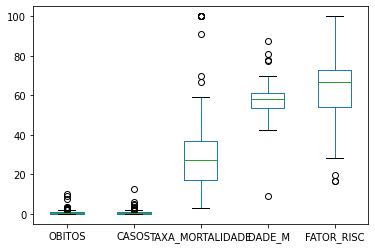

In [17]:
covidObito.plot.box()

In [18]:
covidObito.describe()

OBITOS       CASOS  TAXA_MORTALIDADE     IDADE_M  FATOR_RISC
count  114.000000  114.000000        114.000000  114.000000  114.000000
mean     0.877193    0.876703         31.227355   57.410365   64.558758
std      1.553253    1.516994         23.154944    8.402672   16.635410
min      0.006377    0.001553          3.007519    9.259259   16.666667
25%      0.102034    0.118798         16.987179   53.400441   54.094828
50%      0.392194    0.459663         27.128040   57.964943   66.574331
75%      0.926280    0.875844         36.710224   60.985026   73.061875
max     10.082265   12.789813        100.000000   87.666667  100.000000

In [19]:
covidObito.sort_values(['FATOR_RISC'])

OBITOS     CASOS  \
Bairro                                                         
Planalto Paulista                         0.019131  0.121127   
Engenheiro Goulart                        0.019131  0.018635   
Vila Doutor Eiras                         1.632549  1.225250   
Vila Campestre                            0.707863  0.841680   
Jardim Rossin                             0.019131  0.004659   
...                                            ...       ...   
Vila Invernada                            0.006377  0.001553   
Itaim Bibi                                0.006377  0.001553   
Jardim Casablanca                         0.006377  0.001553   
Jardim Santa Edwiges (Capela do Socorro)  0.006377  0.001553   
Vila das Belezas                          0.006377  0.001553   

                                          TAXA_MORTALIDADE    IDADE_M  \
Bairro                                                                  
Planalto Paulista                                 3.846154  45.500000   
Engenheiro Goulart                               25.000000  48.750000   
Vila Doutor Eiras                                32.446134  58.973384   
Vila Campestre                                   20.479705  54.904059   
Jardim Rossin                                   100.000000  87.666667   
...                                                    ...        ...   
Vila Invernada                                  100.000000  78.000000   
Itaim Bibi                                      100.000000  69.000000   
Jardim Casablanca                               100.000000  64.000000   
Jardim Santa Edwiges (Capela do Socorro)        100.000000  68.000000   
Vila das Belezas                                100.000000  81.000000   

                                          FATOR_RISC  
Bairro                                                
Planalto Paulista                          16.666667  
Engenheiro Goulart                         16.666667  
Vila Doutor Eiras                          19.898606  
Vila Campestre                             28.228782  
Jardim Rossin                              33.333333  
...                                              ...  
Vila Invernada                            100.000000  
Itaim Bibi                                100.000000  
Jardim Casablanca                         100.000000  
Jardim Santa Edwiges (Capela do Socorro)  100.000000  
Vila das Belezas                          100.000000  

[114 rows x 5 columns]

<AxesSubplot:>

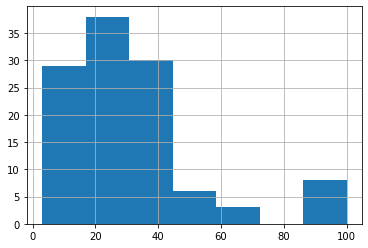

In [20]:
covidObito['TAXA_MORTALIDADE'].hist(bins=7)

<AxesSubplot:>

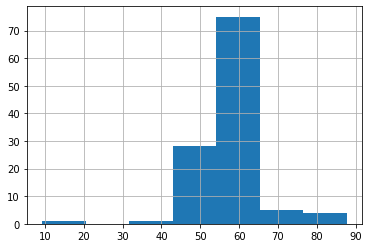

In [21]:
covidObito['IDADE_M'].hist(bins=7)

array([[<AxesSubplot:xlabel='TAXA_MORTALIDADE', ylabel='TAXA_MORTALIDADE'>,
        <AxesSubplot:xlabel='IDADE_M', ylabel='TAXA_MORTALIDADE'>,
        <AxesSubplot:xlabel='FATOR_RISC', ylabel='TAXA_MORTALIDADE'>],
       [<AxesSubplot:xlabel='TAXA_MORTALIDADE', ylabel='IDADE_M'>,
        <AxesSubplot:xlabel='IDADE_M', ylabel='IDADE_M'>,
        <AxesSubplot:xlabel='FATOR_RISC', ylabel='IDADE_M'>],
       [<AxesSubplot:xlabel='TAXA_MORTALIDADE', ylabel='FATOR_RISC'>,
        <AxesSubplot:xlabel='IDADE_M', ylabel='FATOR_RISC'>,
        <AxesSubplot:xlabel='FATOR_RISC', ylabel='FATOR_RISC'>]],
      dtype=object)

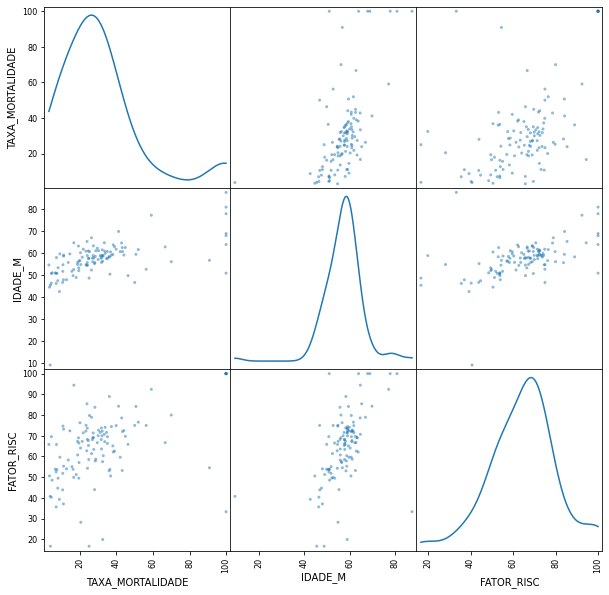

In [22]:
from pandas.plotting import scatter_matrix

scatter_matrix(covidObito[['TAXA_MORTALIDADE','IDADE_M','FATOR_RISC']], figsize=(10, 10), diagonal='kde')

<AxesSubplot:ylabel='Bairro'>

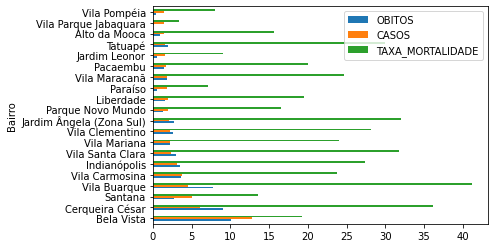

In [23]:
covidObito.head(20).plot.barh(y=['OBITOS', 'CASOS','TAXA_MORTALIDADE'])

<AxesSubplot:ylabel='Bairro'>

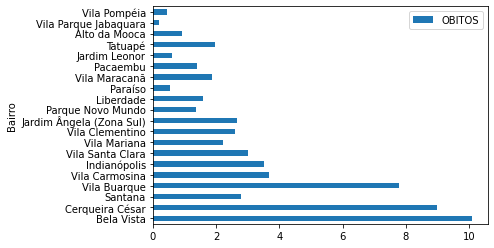

In [24]:
covidObito.head(20).plot.barh(y=['OBITOS'])

<AxesSubplot:ylabel='Bairro'>

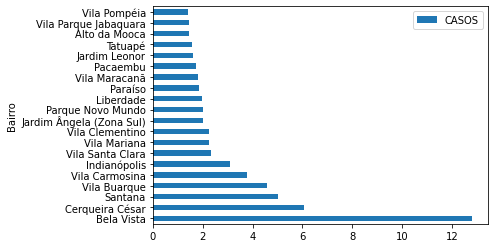

In [25]:
covidObito.head(20).plot.barh(y=['CASOS'])

<AxesSubplot:ylabel='Bairro'>

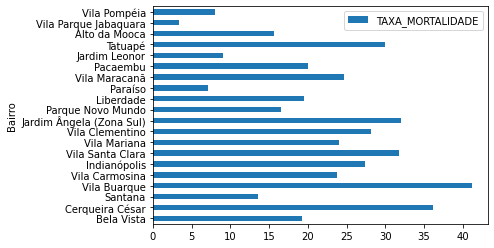

In [26]:
covidObito.head(20).plot.barh(y=['TAXA_MORTALIDADE'])

<AxesSubplot:ylabel='Bairro'>

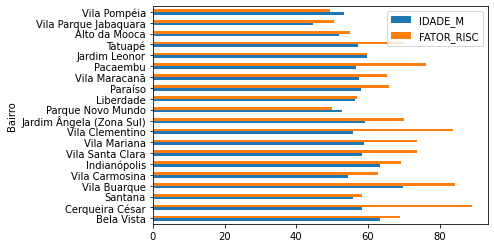

In [27]:
covidObito.head(20).plot.barh(y=['IDADE_M','FATOR_RISC'])

In [28]:
santana = covid[covid['Bairro']=='Santana']
santana

DT_NOTIFIC   Bairro  COVID19 EVOLUCAO  NU_IDADE_N FATOR_RISC
33540  2020-03-21  Santana      1.0     CURA          55          S
33546  2020-03-25  Santana      1.0    OBITO          69          N
33553  2020-03-29  Santana      1.0    OBITO          54          S
33556  2020-03-29  Santana      1.0     CURA          57          S
33560  2020-03-31  Santana      1.0    OBITO          86          S
...           ...      ...      ...      ...         ...        ...
111974 2020-08-05  Santana      1.0     CURA          66          S
111975 2020-08-05  Santana      1.0     CURA          30          S
111976 2020-08-05  Santana      1.0     CURA          70          S
111978 2020-08-05  Santana      1.0    OBITO          62          S
111979 2020-08-08  Santana      1.0     CURA          73          S

[3221 rows x 6 columns]

In [29]:
santana[santana.isna().any(axis=1)]

DT_NOTIFIC   Bairro  COVID19 EVOLUCAO  NU_IDADE_N FATOR_RISC
34134  2020-06-19  Santana      1.0      NaN           1          S
34168  2020-06-23  Santana      1.0      NaN          64          S
34517  2020-08-17  Santana      1.0      NaN          32          N
34633  2020-09-16  Santana      1.0      NaN          86          N
34761  2020-10-18  Santana      1.0      NaN          58          N
...           ...      ...      ...      ...         ...        ...
111398 2020-07-25  Santana      1.0      NaN          31          N
111442 2020-07-26  Santana      1.0      NaN          71          S
111611 2020-07-29  Santana      1.0      NaN          69          S
111676 2020-07-29  Santana      1.0      NaN          53          S
111895 2020-07-31  Santana      1.0      NaN          87          S

[140 rows x 6 columns]

In [30]:
santana[santana['EVOLUCAO']=='OBITO']

DT_NOTIFIC   Bairro  COVID19 EVOLUCAO  NU_IDADE_N FATOR_RISC
33546  2020-03-25  Santana      1.0    OBITO          69          N
33553  2020-03-29  Santana      1.0    OBITO          54          S
33560  2020-03-31  Santana      1.0    OBITO          86          S
33567  2020-03-31  Santana      1.0    OBITO          76          S
33572  2020-04-01  Santana      1.0    OBITO          61          N
...           ...      ...      ...      ...         ...        ...
111261 2020-07-23  Santana      1.0    OBITO          85          S
111407 2020-07-26  Santana      1.0    OBITO          56          S
111591 2020-07-28  Santana      1.0    OBITO          78          S
111870 2020-07-30  Santana      1.0    OBITO          55          S
111978 2020-08-05  Santana      1.0    OBITO          62          S

[438 rows x 6 columns]

<AxesSubplot:xlabel='DT_NOTIFIC'>

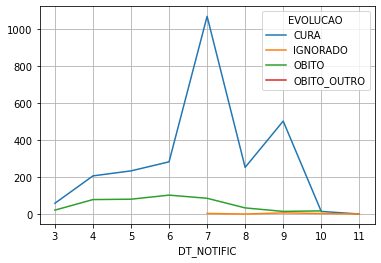

In [31]:
santana[['Bairro', 'COVID19', 'DT_NOTIFIC', 'EVOLUCAO']].groupby([covid.DT_NOTIFIC.dt.month, 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

<AxesSubplot:xlabel='NU_IDADE_N'>

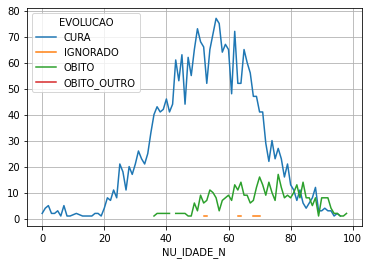

In [32]:
santana[['Bairro', 'COVID19', 'NU_IDADE_N', 'EVOLUCAO']].groupby(['NU_IDADE_N', 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

In [33]:
covidObito.loc['Santana']

OBITOS               2.793189
CASOS                5.001941
TAXA_MORTALIDADE    13.598261
IDADE_M             55.856256
FATOR_RISC          58.273828
Name: Santana, dtype: float64

In [34]:
cerqueira = covid[covid['Bairro']=='Cerqueira César']
cerqueira

DT_NOTIFIC           Bairro  COVID19 EVOLUCAO  NU_IDADE_N FATOR_RISC
19276 2020-03-13  Cerqueira César      1.0     CURA           3          S
19282 2020-03-17  Cerqueira César      1.0     CURA          56          S
19293 2020-03-18  Cerqueira César      1.0     CURA          84          N
19300 2020-03-18  Cerqueira César      1.0    OBITO          64          S
19305 2020-03-19  Cerqueira César      1.0     CURA          58          N
...          ...              ...      ...      ...         ...        ...
24654 2020-11-13  Cerqueira César      1.0      NaN          46          N
24655 2020-11-16  Cerqueira César      1.0      NaN          31          N
24656 2020-11-16  Cerqueira César      1.0      NaN          52          N
24657 2020-11-16  Cerqueira César      1.0      NaN          64          S
24658 2020-11-16  Cerqueira César      1.0      NaN          74          S

[3905 rows x 6 columns]

<AxesSubplot:xlabel='DT_NOTIFIC'>

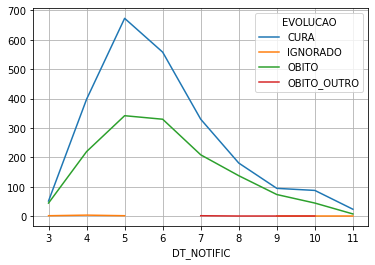

In [35]:
cerqueira[['Bairro', 'COVID19', 'DT_NOTIFIC', 'EVOLUCAO']].groupby([covid.DT_NOTIFIC.dt.month, 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

<AxesSubplot:xlabel='NU_IDADE_N'>

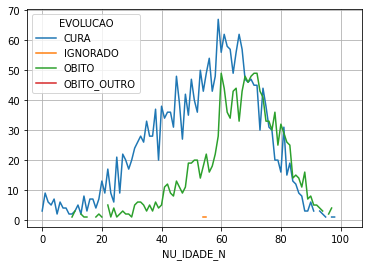

In [36]:
cerqueira[['Bairro', 'COVID19', 'NU_IDADE_N', 'EVOLUCAO']].groupby(['NU_IDADE_N', 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

In [37]:
covidObito.loc['Cerqueira César']

OBITOS               8.998151
CASOS                6.064135
TAXA_MORTALIDADE    36.133163
IDADE_M             58.385659
FATOR_RISC          88.962868
Name: Cerqueira César, dtype: float64

In [38]:
buarque = covid[covid['Bairro']=='Vila Buarque']
buarque

DT_NOTIFIC        Bairro  COVID19 EVOLUCAO  NU_IDADE_N FATOR_RISC
30293  2020-03-21  Vila Buarque      1.0    OBITO          85          S
30301  2020-03-23  Vila Buarque      1.0    OBITO          86          S
30302  2020-03-23  Vila Buarque      1.0    OBITO          79          S
30310  2020-03-24  Vila Buarque      1.0     CURA          67          S
30327  2020-03-26  Vila Buarque      1.0     CURA          64          N
...           ...           ...      ...      ...         ...        ...
107503 2020-08-28  Vila Buarque      1.0     CURA          78          S
107512 2020-09-10  Vila Buarque      1.0     CURA          53          S
107527 2020-10-27  Vila Buarque      1.0    OBITO          21          S
107530 2020-10-29  Vila Buarque      1.0      NaN          64          S
107532 2020-11-06  Vila Buarque      1.0      NaN          84          S

[2962 rows x 6 columns]

<AxesSubplot:xlabel='DT_NOTIFIC'>

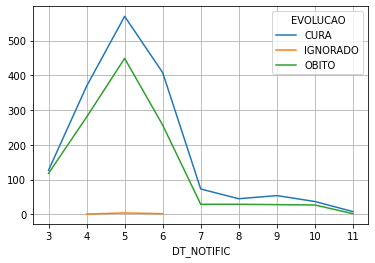

In [39]:
buarque[['Bairro', 'COVID19', 'DT_NOTIFIC', 'EVOLUCAO']].groupby([covid.DT_NOTIFIC.dt.month, 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

<AxesSubplot:xlabel='NU_IDADE_N'>

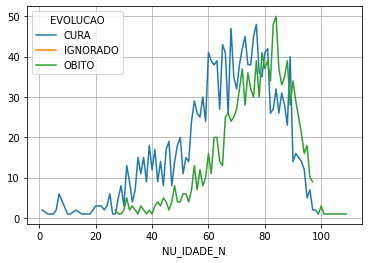

In [40]:
buarque[['Bairro', 'COVID19', 'NU_IDADE_N', 'EVOLUCAO']].groupby(['NU_IDADE_N', 'EVOLUCAO']).sum().squeeze().unstack().plot(grid=True)

In [41]:
covidObito.loc['Vila Buarque']

OBITOS               7.773739
CASOS                4.599736
TAXA_MORTALIDADE    41.154625
IDADE_M             69.938217
FATOR_RISC          84.267387
Name: Vila Buarque, dtype: float64

In [42]:
gdf = gpd.read_file('./data/DEINFO_DISTRITO.shp')
cets = pd.read_csv('./data/CETESB_geo_info.csv')
gdf.NOME_DIST = gdf.NOME_DIST.apply(lambda x: x.replace("JD", 'JARDIM'))
gdf.NOME_DIST = gdf.NOME_DIST.apply(lambda x: x.replace("CID", 'CIDADE'))
gdf.NOME_DIST.unique()

array(['JOSE BONIFACIO', 'JARDIM SAO LUIS', 'ARTUR ALVIM', 'JAGUARA',
       'VILA PRUDENTE', 'JAGUARE', 'JARAGUA', 'JARDIM HELENA',
       'JARDIM PAULISTA', 'LAJEADO', 'LAPA', 'LIBERDADE', 'LIMAO',
       'VILA MEDEIROS', 'JARDIM ANGELA', 'PARELHEIROS', 'VILA SONIA',
       'AGUA RASA', 'ALTO DE PINHEIROS', 'ANHANGUERA', 'ARICANDUVA',
       'BARRA FUNDA', 'BELA VISTA', 'BELEM', 'BOM RETIRO', 'BRAS',
       'BRASILANDIA', 'BUTANTA', 'CACHOEIRINHA', 'CAMBUCI', 'CAMPO BELO',
       'CAMPO GRANDE', 'CAMPO LIMPO', 'CANGAIBA', 'CAPAO REDONDO',
       'CARRAO', 'CASA VERDE', 'CIDADE ADEMAR', 'CIDADE DUTRA',
       'CIDADE LIDER', 'CIDADE TIRADENTES', 'CONSOLACAO', 'CURSINO',
       'ERMELINO MATARAZZO', 'FREGUESIA DO O', 'GRAJAU', 'GUAIANASES',
       'IGUATEMI', 'IPIRANGA', 'ITAIM BIBI', 'ITAIM PAULISTA', 'ITAQUERA',
       'JABAQUARA', 'JACANA', 'MANDAQUI', 'MARSILAC', 'MOEMA', 'MOOCA',
       'MORUMBI', 'PARI', 'PARQUE DO CARMO', 'PEDREIRA', 'PENHA',
       'PERDIZES', 'PERUS', 'PINHEIR

## Plotando Mapa

In [43]:
transform = pd.read_csv('./data/bairros_Distritos.csv', index_col=0)
transform.head()

Distrito
Bairro                          
Cerqueira César  JARDIM PAULISTA
Paraíso             VILA MARIANA
Vila Campestre         JABAQUARA
Vila Carmosina   PARQUE DO CARMO
Indianópolis               MOEMA

In [44]:
covidObito2 = pd.merge(covidObito,transform, left_on='Bairro', right_index=True)
mediaCovid = covidObito2[['Distrito','TAXA_MORTALIDADE','IDADE_M','FATOR_RISC']].groupby(['Distrito']).mean()
countCovid = covidObito2[['Distrito','OBITOS','CASOS']].groupby(['Distrito']).sum()
covidObito2 = pd.merge(countCovid,mediaCovid, left_index=True, right_index=True)
covidObito2

OBITOS      CASOS  TAXA_MORTALIDADE    IDADE_M  FATOR_RISC
Distrito                                                                      
AGUA RASA         3.271475   3.248699         46.074558  62.463666   75.869774
ARTUR ALVIM       0.561189   0.357171         38.260870  63.826087   62.173913
BELA VISTA       10.088642  12.831742         11.449958  36.281888   54.877413
BELEM             0.274217   0.930196         25.321269  48.163935   53.088120
BRAS              0.618583   0.557497         27.019499  56.175487   69.080780
...                    ...        ...               ...        ...         ...
VILA JACUI        0.038263   0.088516         10.526316  46.807018   43.859649
VILA LEOPOLDINA   0.153051   0.119575         29.537205  62.905626   69.646098
VILA MARIA        2.818698   3.239382         20.028987  55.330927   58.528200
VILA MARIANA      5.363178   6.346766         19.782932  57.596235   74.394035
VILA MATILDE      0.931063   0.529544         42.815249  64.700880   78.592375

[62 rows x 5 columns]

In [45]:
cidade = pd.merge(gdf,covidObito2, left_on='NOME_DIST', right_index=True, how='left')
cidade

CLASSID     FEATID  REVISIONNU        NOME_DIST SIGLA_DIST COD_DIST  \
0       4.0  8583485.0         1.0   JOSE BONIFACIO        JBO       47   
1       4.0  8583484.0         1.0  JARDIM SAO LUIS        JDS       46   
2       4.0  8583445.0         1.0      ARTUR ALVIM        AAL        5   
3       4.0  8583479.0         1.0          JAGUARA        JAG       40   
4       4.0  8583437.0         1.0    VILA PRUDENTE        VPR       93   
..      ...        ...         ...              ...        ...      ...   
91      4.0  8583433.0         1.0       VILA MARIA        VMR       89   
92      4.0  8583434.0         1.0     VILA MARIANA        VMN       90   
93      4.0  8583435.0         1.0     VILA MATILDE        VMT       91   
94      4.0  8583412.0         1.0    SANTA CECILIA        SCE       69   
95      4.0  8583409.0         1.0        REPUBLICA        REP       66   

   COD_SUB  DATA_CRIAC  USUARIO_ID  \
0       27  2007-03-19         0.0   
1       18  2007-03-19         0.0   
2       21  2007-03-19         0.0   
3       08  2007-03-19         0.0   
4       29  2007-03-19         0.0   
..     ...         ...         ...   
91      07  2007-03-19         0.0   
92      12  2007-03-19         0.0   
93      21  2007-03-19         0.0   
94      09  2007-03-19         0.0   
95      09  2007-03-19         0.0   

                                             geometry    OBITOS     CASOS  \
0   POLYGON ((352436.869 7394174.148, 352450.740 7...       NaN       NaN   
1   POLYGON ((320696.639 7383620.282, 320699.486 7...  1.913143  1.868157   
2   POLYGON ((349461.276 7397764.525, 349461.935 7...  0.561189  0.357171   
3   POLYGON ((320731.080 7400614.592, 320732.386 7...  0.401760  0.268654   
4   POLYGON ((338651.039 7392203.484, 338654.034 7...       NaN       NaN   
..                                                ...       ...       ...   
91  POLYGON ((338228.823 7397145.610, 338216.895 7...  2.818698  3.239382   
92  POLYGON ((331606.384 7389277.797, 331607.340 7...  5.363178  6.346766   
93  POLYGON ((341994.993 7396441.620, 341979.394 7...  0.931063  0.529544   
94  POLYGON ((330220.609 7396091.962, 330226.819 7...  8.283910  5.509745   
95  POLYGON ((331990.790 7395882.037, 332014.420 7...       NaN       NaN   

    TAXA_MORTALIDADE    IDADE_M  FATOR_RISC  
0                NaN        NaN         NaN  
1          64.125029  61.377699   82.236487  
2          38.260870  63.826087   62.173913  
3          36.416185  50.537572   53.757225  
4                NaN        NaN         NaN  
..               ...        ...         ...  
91         20.028987  55.330927   58.528200  
92         19.782932  57.596235   74.394035  
93         42.815249  64.700880   78.592375  
94         25.452129  61.223854   70.589740  
95               NaN        NaN         NaN  

[96 rows x 15 columns]

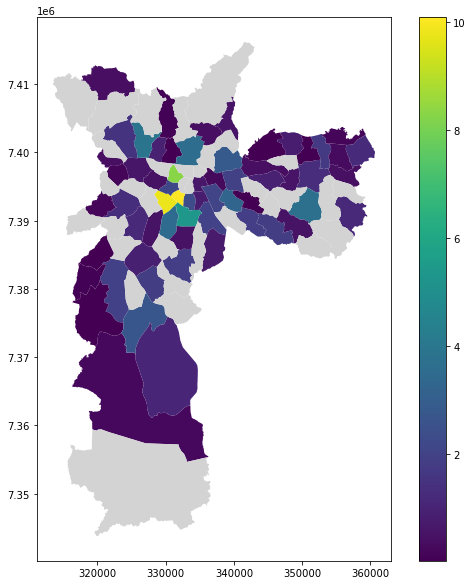

In [46]:
cidade.plot(column='OBITOS', legend=True, missing_kwds={'color': 'lightgrey'},figsize=(10,10))
plt.show()

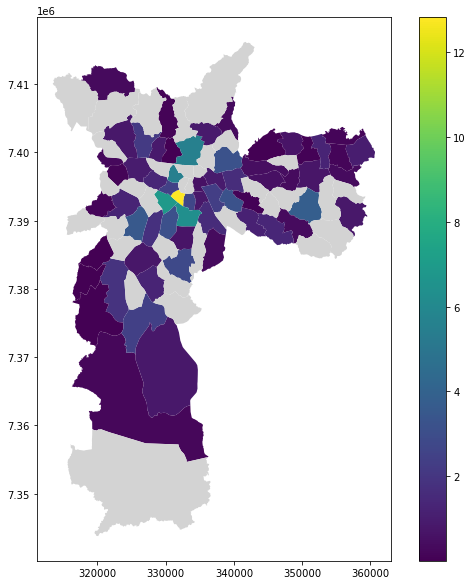

In [47]:
cidade.plot(column='CASOS', legend=True, missing_kwds={'color': 'lightgrey'},figsize=(10,10))
plt.show()

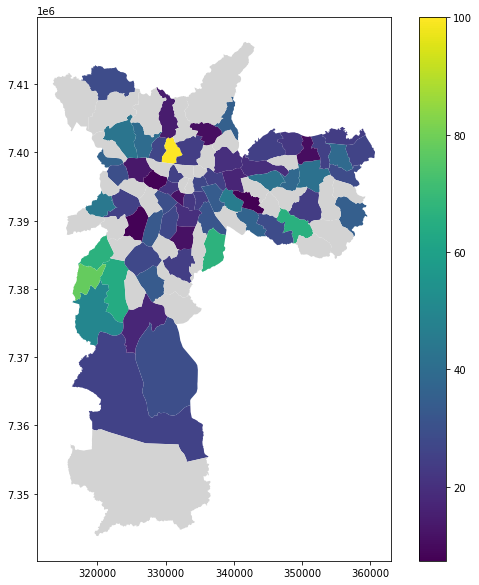

In [48]:
cidade.plot(column='TAXA_MORTALIDADE', legend=True, missing_kwds={'color': 'lightgrey'},figsize=(10,10))
plt.show()

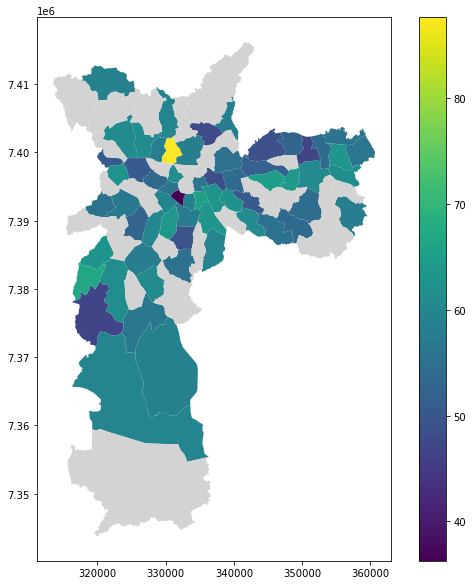

In [49]:
cidade.plot(column='IDADE_M', legend=True, missing_kwds={'color': 'lightgrey'},figsize=(10,10))
plt.show()

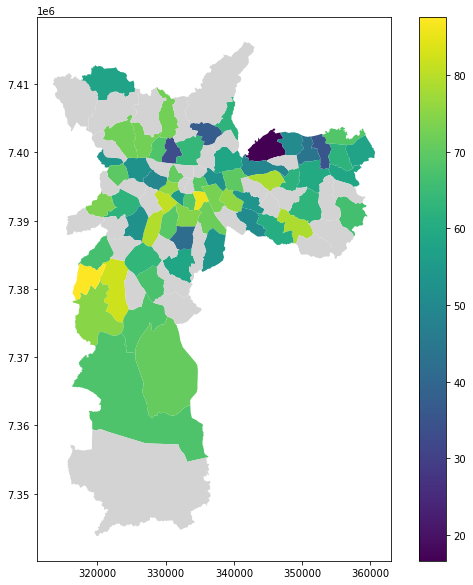

In [50]:
cidade.plot(column='FATOR_RISC', legend=True, missing_kwds={'color': 'lightgrey'},figsize=(10,10))
plt.show()

# Mapa de Desconhecidos

In [51]:
nEsp = data_saud[data_saud['N_ESPECIFICADO'] == 1.0]
nEsp = nEsp[['DT_NOTIFIC', 'Bairro', 'N_ESPECIFICADO', 'EVOLUCAO', 'NU_IDADE_N', 'FATOR_RISC']]
nEsp.DT_NOTIFIC = pd.to_datetime(nEsp.DT_NOTIFIC, infer_datetime_format=True)
nEsp[nEsp['Bairro']=='Itaim Bibi']

DT_NOTIFIC      Bairro  N_ESPECIFICADO EVOLUCAO  NU_IDADE_N FATOR_RISC
106592 2020-05-29  Itaim Bibi             1.0    OBITO          78          S
106593 2020-06-11  Itaim Bibi             1.0    OBITO          75          S
106594 2020-07-30  Itaim Bibi             1.0    OBITO          83          S
106595 2020-09-16  Itaim Bibi             1.0    OBITO          83          S

In [52]:
nEspObito = nEsp[nEsp['EVOLUCAO'] == 'OBITO']
nEspObito = nEspObito[['Bairro','EVOLUCAO']].groupby(['Bairro']).count()
nEspObito.rename(columns={'EVOLUCAO':'OBITOS'}, inplace = True)
nEspCasos = nEsp[['Bairro','N_ESPECIFICADO']].groupby(['Bairro']).count()
nEspCasos.rename(columns={'N_ESPECIFICADO':'CASOS'}, inplace = True)
nEspObito = pd.merge(nEspObito,nEspCasos, left_index=True, right_index=True)
nEspObito.head()

OBITOS  CASOS
Bairro                           
Aclimação               48    260
Alto da Mooca           67    546
Balneário São José      12     60
Barra Funda             28    198
Bela Vista             589   4344

In [53]:
nEspObito['TAXA_MORTALIDADE']=(nEspObito['OBITOS']/nEspObito['CASOS'])*100
nEspObito = nEspObito.sort_values(['CASOS'], ascending = False)
#covidObito = covidObito.query("CASOS > 100")
nEspObito

OBITOS  CASOS  TAXA_MORTALIDADE
Bairro                                                       
Bela Vista                       589   4344         13.558932
Santana                          250   2257         11.076650
Indianópolis                     354   2094         16.905444
Vila Buarque                     668   1996         33.466934
Vila Carmosina                   226   1813         12.465527
...                              ...    ...               ...
Parque Novo Santo Amaro            1      1        100.000000
Jardim Brasília (Zona Leste)       1      1        100.000000
Jardim Rossin                      1      1        100.000000
Jardim Satélite                    1      1        100.000000
Parque do Lago                     1      1        100.000000

[122 rows x 3 columns]

In [54]:
nEspIdade = nEsp[['Bairro','NU_IDADE_N']].groupby(['Bairro']).mean()
nEspIdade.rename(columns={'NU_IDADE_N':'IDADE_M'}, inplace = True)
nEspIdade.head()

IDADE_M
Bairro                       
Aclimação           51.242308
Alto da Mooca       53.062271
Balneário São José  51.766667
Barra Funda         51.404040
Bela Vista          62.666897

In [55]:
nEspObito = pd.merge(nEspObito,nEspIdade, left_index=True, right_index=True)
nEspRisco = nEsp[nEsp['FATOR_RISC'] == 'S']
nEspRisco = nEspRisco[['Bairro','FATOR_RISC']].groupby(['Bairro']).count() 
nEspObito = pd.merge(nEspObito,nEspRisco, left_index=True, right_index=True)
nEspObito

OBITOS  CASOS  TAXA_MORTALIDADE    IDADE_M  \
Bairro                                                                         
Bela Vista                           589   4344         13.558932  62.666897   
Santana                              250   2257         11.076650  47.166593   
Indianópolis                         354   2094         16.905444  58.325692   
Vila Buarque                         668   1996         33.466934  67.221443   
Vila Carmosina                       226   1813         12.465527  46.192499   
...                                  ...    ...               ...        ...   
Chácara Santo Antônio (Zona Sul)       1      1        100.000000  86.000000   
Parque Novo Santo Amaro                1      1        100.000000  65.000000   
Jardim Rossin                          1      1        100.000000  89.000000   
Jardim Satélite                        1      1        100.000000  59.000000   
Parque do Lago                         1      1        100.000000  66.000000   

                                  FATOR_RISC  
Bairro                                        
Bela Vista                              3105  
Santana                                 1163  
Indianópolis                            1358  
Vila Buarque                            1706  
Vila Carmosina                          1161  
...                                      ...  
Chácara Santo Antônio (Zona Sul)           1  
Parque Novo Santo Amaro                    1  
Jardim Rossin                              1  
Jardim Satélite                            1  
Parque do Lago                             1  

[121 rows x 5 columns]

In [56]:
norm = nEsp.N_ESPECIFICADO.size
norm2 = sum(nEspObito['OBITOS'])
nEspObito['FATOR_RISC']=(nEspObito['FATOR_RISC']/nEspObito['CASOS'])*100
nEspObito['OBITOS'] = (nEspObito['OBITOS']/norm2)*100
nEspObito['CASOS'] = (nEspObito['CASOS']/norm)*100

nEspObito

OBITOS     CASOS  TAXA_MORTALIDADE  \
Bairro                                                                   
Bela Vista                        7.101519  9.256734         13.558932   
Santana                           3.014227  4.809495         11.076650   
Indianópolis                      4.268146  4.462155         16.905444   
Vila Buarque                      8.054015  4.253324         33.466934   
Vila Carmosina                    2.724861  3.863365         12.465527   
...                                    ...       ...               ...   
Chácara Santo Antônio (Zona Sul)  0.012057  0.002131        100.000000   
Parque Novo Santo Amaro           0.012057  0.002131        100.000000   
Jardim Rossin                     0.012057  0.002131        100.000000   
Jardim Satélite                   0.012057  0.002131        100.000000   
Parque do Lago                    0.012057  0.002131        100.000000   

                                    IDADE_M  FATOR_RISC  
Bairro                                                   
Bela Vista                        62.666897   71.477901  
Santana                           47.166593   51.528578  
Indianópolis                      58.325692   64.851958  
Vila Buarque                      67.221443   85.470942  
Vila Carmosina                    46.192499   64.037507  
...                                     ...         ...  
Chácara Santo Antônio (Zona Sul)  86.000000  100.000000  
Parque Novo Santo Amaro           65.000000  100.000000  
Jardim Rossin                     89.000000  100.000000  
Jardim Satélite                   59.000000  100.000000  
Parque do Lago                    66.000000  100.000000  

[121 rows x 5 columns]

In [57]:
nEspObito2 = pd.merge(nEspObito,transform, left_on='Bairro', right_index=True)
mediaNesp = nEspObito2[['Distrito','TAXA_MORTALIDADE','IDADE_M','FATOR_RISC']].groupby(['Distrito']).mean()
countNesp = nEspObito2[['Distrito','OBITOS','CASOS']].groupby(['Distrito']).sum()
nEspObito2 = pd.merge(countNesp,mediaNesp, left_index=True, right_index=True)
nEspObito2

OBITOS      CASOS  TAXA_MORTALIDADE    IDADE_M  FATOR_RISC
Distrito                                                                     
AGUA RASA        1.989390   2.209768         14.246772  47.272489   60.742468
ARTUR ALVIM      1.145406   0.477327         47.424242  52.731818   70.606061
BELA VISTA       7.137690  10.128282          7.146214  34.178192   58.355087
BELEM            0.180854   0.850239          4.348686  31.119935   44.630421
BRAS             0.229081   0.351602         11.515152  56.478788   58.787879
...                   ...        ...               ...        ...         ...
VILA JACUI       0.060285   0.127855          8.333333  34.466667   43.333333
VILA LEOPOLDINA  0.325537   0.238663         22.083926  67.243243   77.809388
VILA MARIA       2.978056   3.558643         14.530619  52.991982   60.057905
VILA MARIANA     4.967446   5.964456         12.807650  50.799538   73.352321
VILA MATILDE     0.819870   0.411268         35.233161  60.388601   74.611399

[66 rows x 5 columns]

In [58]:
cidadeDesc = pd.merge(gdf,nEspObito2, left_on='NOME_DIST', right_index=True, how='left')
cidadeDesc

CLASSID     FEATID  REVISIONNU        NOME_DIST SIGLA_DIST COD_DIST  \
0       4.0  8583485.0         1.0   JOSE BONIFACIO        JBO       47   
1       4.0  8583484.0         1.0  JARDIM SAO LUIS        JDS       46   
2       4.0  8583445.0         1.0      ARTUR ALVIM        AAL        5   
3       4.0  8583479.0         1.0          JAGUARA        JAG       40   
4       4.0  8583437.0         1.0    VILA PRUDENTE        VPR       93   
..      ...        ...         ...              ...        ...      ...   
91      4.0  8583433.0         1.0       VILA MARIA        VMR       89   
92      4.0  8583434.0         1.0     VILA MARIANA        VMN       90   
93      4.0  8583435.0         1.0     VILA MATILDE        VMT       91   
94      4.0  8583412.0         1.0    SANTA CECILIA        SCE       69   
95      4.0  8583409.0         1.0        REPUBLICA        REP       66   

   COD_SUB  DATA_CRIAC  USUARIO_ID  \
0       27  2007-03-19         0.0   
1       18  2007-03-19         0.0   
2       21  2007-03-19         0.0   
3       08  2007-03-19         0.0   
4       29  2007-03-19         0.0   
..     ...         ...         ...   
91      07  2007-03-19         0.0   
92      12  2007-03-19         0.0   
93      21  2007-03-19         0.0   
94      09  2007-03-19         0.0   
95      09  2007-03-19         0.0   

                                             geometry    OBITOS     CASOS  \
0   POLYGON ((352436.869 7394174.148, 352450.740 7...       NaN       NaN   
1   POLYGON ((320696.639 7383620.282, 320699.486 7...  2.314926  3.773866   
2   POLYGON ((349461.276 7397764.525, 349461.935 7...  1.145406  0.477327   
3   POLYGON ((320731.080 7400614.592, 320732.386 7...  0.217024  0.187521   
4   POLYGON ((338651.039 7392203.484, 338654.034 7...       NaN       NaN   
..                                                ...       ...       ...   
91  POLYGON ((338228.823 7397145.610, 338216.895 7...  2.978056  3.558643   
92  POLYGON ((331606.384 7389277.797, 331607.340 7...  4.967446  5.964456   
93  POLYGON ((341994.993 7396441.620, 341979.394 7...  0.819870  0.411268   
94  POLYGON ((330220.609 7396091.962, 330226.819 7...  8.620690  4.888340   
95  POLYGON ((331990.790 7395882.037, 332014.420 7...       NaN       NaN   

    TAXA_MORTALIDADE    IDADE_M  FATOR_RISC  
0                NaN        NaN         NaN  
1          30.398530  52.862493   76.116450  
2          47.424242  52.731818   70.606061  
3          20.454545  48.545455   40.909091  
4                NaN        NaN         NaN  
..               ...        ...         ...  
91         14.530619  52.991982   60.057905  
92         12.807650  50.799538   73.352321  
93         35.233161  60.388601   74.611399  
94         22.202783  55.708494   66.870785  
95               NaN        NaN         NaN  

[96 rows x 15 columns]

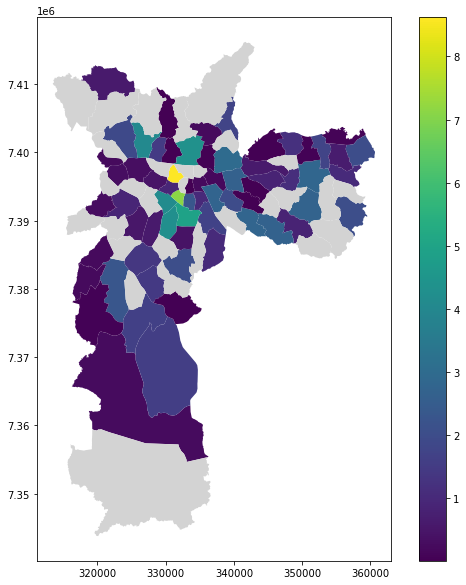

In [59]:
cidadeDesc.plot(column='OBITOS', legend=True, missing_kwds={'color': 'lightgrey'},figsize=(10,10))
plt.show()

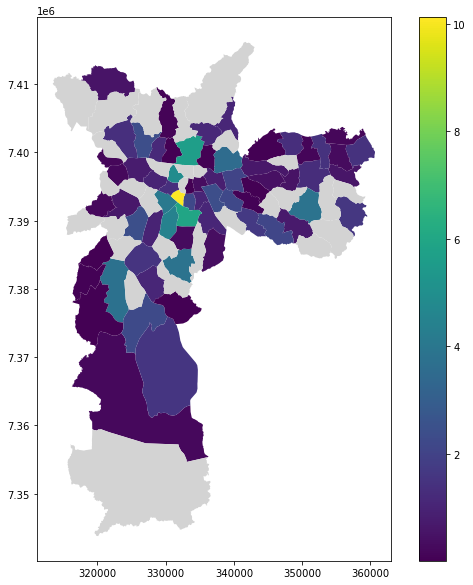

In [60]:
cidadeDesc.plot(column='CASOS', legend=True, missing_kwds={'color': 'lightgrey'},figsize=(10,10))
plt.show()

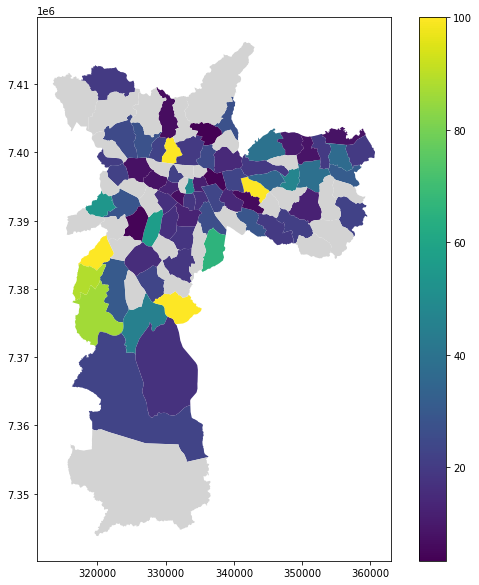

In [61]:
cidadeDesc.plot(column='TAXA_MORTALIDADE', legend=True, missing_kwds={'color': 'lightgrey'},figsize=(10,10))
plt.show()

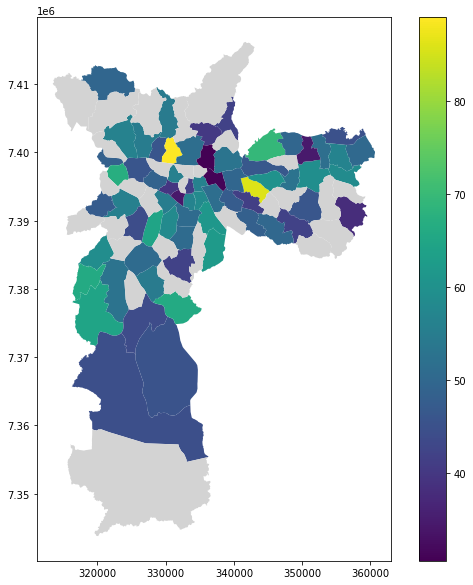

In [62]:
cidadeDesc.plot(column='IDADE_M', legend=True, missing_kwds={'color': 'lightgrey'},figsize=(10,10))
plt.show()

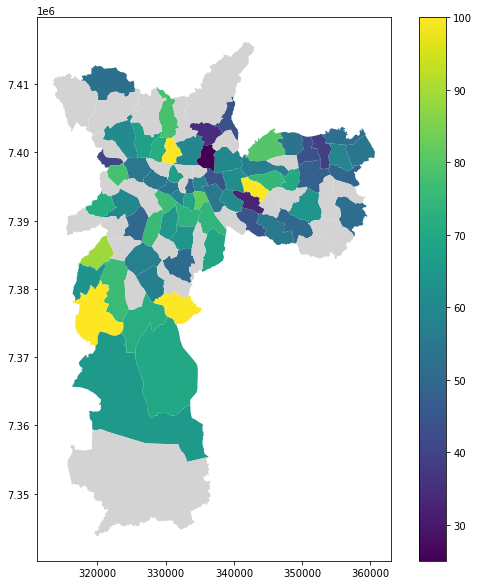

In [63]:
cidadeDesc.plot(column='FATOR_RISC', legend=True, missing_kwds={'color': 'lightgrey'},figsize=(10,10))
plt.show()

In [64]:
nEspObito2[nEspObito2.columns[0:]].corr().style.background_gradient(cmap='RdBu')